# Technical Tests for Data Scientists 
       By Mohamed Niang, Data Scientist / ML Engineer

Presentation 

This notebook is a compilation of technical test exercises and answers for data scientists and Computer Scientist.

## Exercise 0

QUESTION

Our client is a French bank with international subsidiaries.

This client consults us to help him with the following problem: the bank is losing customers in its French market.

Following a Data Science approach, formulate an answer to the following 3 questions:

1.	What are the questions to ask our client to understand his problem?
2.	What data would you need to retrieve from the customer to conduct one or more analysis(s) on his problem?
3.	Describe the technical approach you would propose to our client to solve his problem. 

ANSWERS

1. The questions that can be asked to the client to understand the problem are :
    - Characteristics of clients who have already churned (left the bank);
    - the behaviors (predictors) of these clients before the churn occurred.


2.  We need labeled client data consisting of their behaviors (predictors) and a binary churn response variable (yes or no).


3. The technical approach to solving the problem is the use of supervised learning methods to solve the problem (using the XGBoost model or logistic regression).

## Exercise 1

Array Challenge

Have the function ArrayChallenge(arr) read the array of numbers stored in arr which will contain a sliding window size, N, as the first element in the array and the rest will be a list of numbers. Your program should return the Moving Median for each element based on the element and its N-1 predecessors, where N is the sliding window size. The final output should be a string with the moving median corresponding to each entry in the original array separated by commas.

Note that for the first few elements (until the window size is reached), the median is computed on a smaller number of entries. For example: if arr is [3, 1, 3, 5, 10, 6, 4, 3, 1] then your program should output "1,2,3,5,6,6,4,3"

In [1]:
import pandas as pd

def ArrayChallenge(arr):
    
    # code goes here
    window = arr[0]
    arg = pd.Series(arr[1:]) 
    opt = arg.rolling(window, min_periods=1).median().round().astype(int)
    s = pd.Series(opt, dtype="string")
    res = s.astype(str).str.cat(sep=',')
    
    return res

In [2]:
# keep this function call here 
arr = [3,1,3,5,10,6,4,3,1]
print(ArrayChallenge(arr))

1,2,3,5,6,6,4,3


## Exercise 2

Array Challenge

Have the function ArrayChallenge(arr) take the array of numbers stored in arr and return the string true if any combination of numbers in the array (excluding the largest number) can be added up to equal the largest number in the array, otherwise return the string false. For example: if arr contains [4, 6, 23, 10, 1, 3] the output should return true because 4 + 6 + 10 + 3 = 23. The array will not be empty, will not contain all the same elements, and may contain negative numbers.

In [3]:
def ArrayChallenge(arr):   
    
    # code goes here
    largest_number = arr[0]

    for i in range(0, len(arr)):       
        if(arr[i] > largest_number):    
            largest_number = arr[i]

    sum = 0

    for elem in arr:
        if elem != largest_number:
            sum = sum + elem

    res = sum >= largest_number

    res = str(res).lower()

    return res


In [4]:
# keep this function call here 
arr = [4,6,23,10,1,3]
print(ArrayChallenge(arr))

true


# Exercise 3

Array Challenge

Have the function ArrayChallenge(arr) take the array of non-negative integers stored in arr, and determine the largest amount of water that can be trapped. The numbers in the array represent the height of a building (where the width of each building is 1) and if you imagine it raining, water will be trapped between the two tallest buildings. For example: if arr is [3, 0, 0, 2, 0, 4] then this array of building heights looks like the following picture if we draw it out:

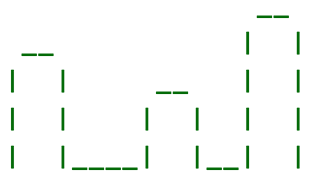

Now if you imagine it rains and water gets trapped in this picture, then it'll look like the following (the x's represent water):

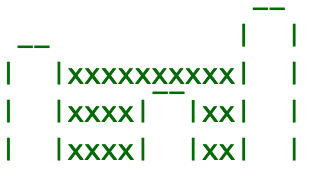

This is the most water that can be trapped in this picture, and if you calculate the area you get 10, so your program should return 10.

In [5]:
def ArrayChallenge(arr):
    
    # code goes here
    n = len(arr)
    area = 0

    for i in range(1,n-1):
        left = arr[i]
        for j in range(i):
            left = max(left,arr[j])

        right = arr[i]
        for j in range(i+1,n):
            right = max(right,arr[j])

        area = area + (min(left,right) - arr[i]) 

    return area

In [6]:
# keep this function call here 
arr = [3,0,0,2,0,4]
print(ArrayChallenge(arr))

10


# Exercise 4

Back-end Challenge

In the Python file, write a program to perform a GET request on the route https://coderbyte.com/api/challenges/json/age-counting which contains a data key and the value is a string which contains items in the format: key=STRING, age=INTEGER. Your goal is to count how many items exist that have an age equal to or greater than 50, and print this final value.

In [7]:
import requests

r = requests.get('https://coderbyte.com/api/challenges/json/age-counting')
data = r.json()

In [8]:
count = 0

for i,value in enumerate(data["data"].split(","),0):
    if(i%2==1) and int(value.strip()[4:]) >= 50:
        count = count + 1

print(count)

128
